Introduction: Using Python to Analyze Uber Ride Data
Ride-hailing services like Uber have transformed transportation in today's hectic metropolitan environment by facilitating a smooth interaction between drivers and passengers. Gaining insights that enhance user experience, boost operational efficiency, and adjust to changing market demands requires an understanding of the massive volumes of data produced by these services.

This project uses Python, one of the most potent and adaptable data analysis languages, to examine Uber ride data. Effective data exploration, visualization, and interpretation are made possible by Python's robust library ecosystem, which includes Pandas, NumPy, Matplotlib, Seaborn, and Plotly.

With this investigation, we want to answer important issues like:

When is the peak demand for Uber rides?
How do ride trends change from day to day?
What aspects affect the cost and length of the ride?
Do there exist regions with continually strong demand?
Our methodical approach consists of:

Data cleaning and preprocessing: addressing missing values, formatting data, and developing practical features to get the dataset ready for analysis.
EDA, or exploratory data analysis: using descriptive statistics and visualization to find trends and patterns.
Insights and Visualization: Presenting results in an understandable and engaging manner by utilizing Python's visualization features.
Uber's business strategy will benefit greatly from the analysis's findings, which will optimize user satisfaction, dynamic pricing, and driver allocation. Additionally, this project illustrates the value of data in contemporary decision-making and shows how Python may be used practically to address real-world problems.

In [ ]:
# Let's import the necessary data sets  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# After importing all the libraries,  download the data using the pd.csv 

In [15]:
dataset = pd.read_csv("Documents/UBER_DATA ANALYSIS/UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
# We can use dataset.shape to determine the dataset's shape.

In [19]:
dataset.shape

(1156, 7)

In [21]:
# We must be aware of the datatype, null values count, and other details in order to fully comprehend the data.
# Therefore, we will utilize the code below for that.

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Preparing Data
We will use a NOT keyword to fill in the null entries in the PURPOSE column because we know that there are a lot of them.
You could perhaps try something different.

In [28]:
dataset = dataset.assign(PURPOSE=dataset['PURPOSE'].fillna("NOT"))


In [30]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


The following action is now It is necessary to convert the START_DATE and END_DATE 
to the date_time format for additional analysis.

In [33]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors='coerce')

After splitting the START_DATE into the date and time columns, 
the time is then separated into four categories: 
morning, afternoon, evening, and night.

In [36]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [38]:
dataset.dropna(inplace=True)

Data Visualization
In this section, we will try to understand and contrast each column.
Let's start by looking at the object datatype columns' unique values in the dataset.

In [41]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

Now, we'll use the matplotlib and seaborn libraries to countplot the CATEGORY and PURPOSE columns.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

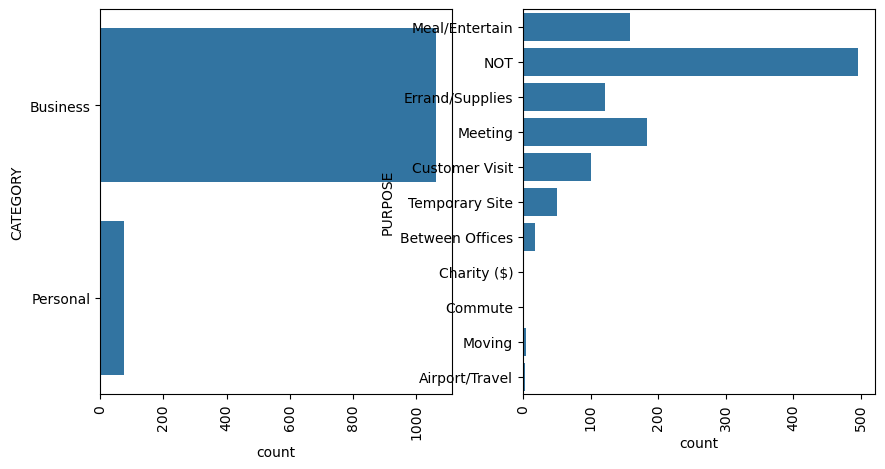

In [44]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

Since we already retrieved the time column, let's repeat the procedure for the time column.

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500')])

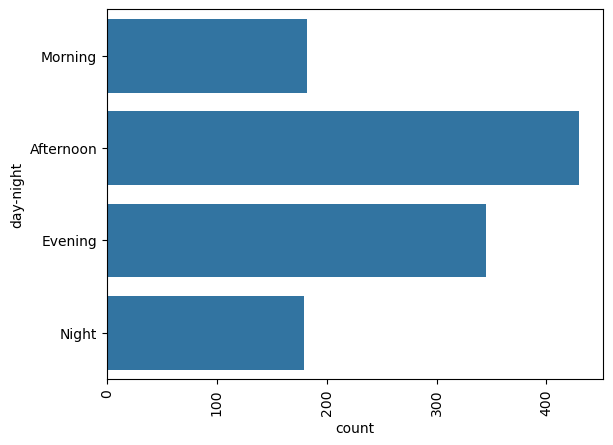

In [47]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

We will now compare the two different groups with the user's PURPOSE.

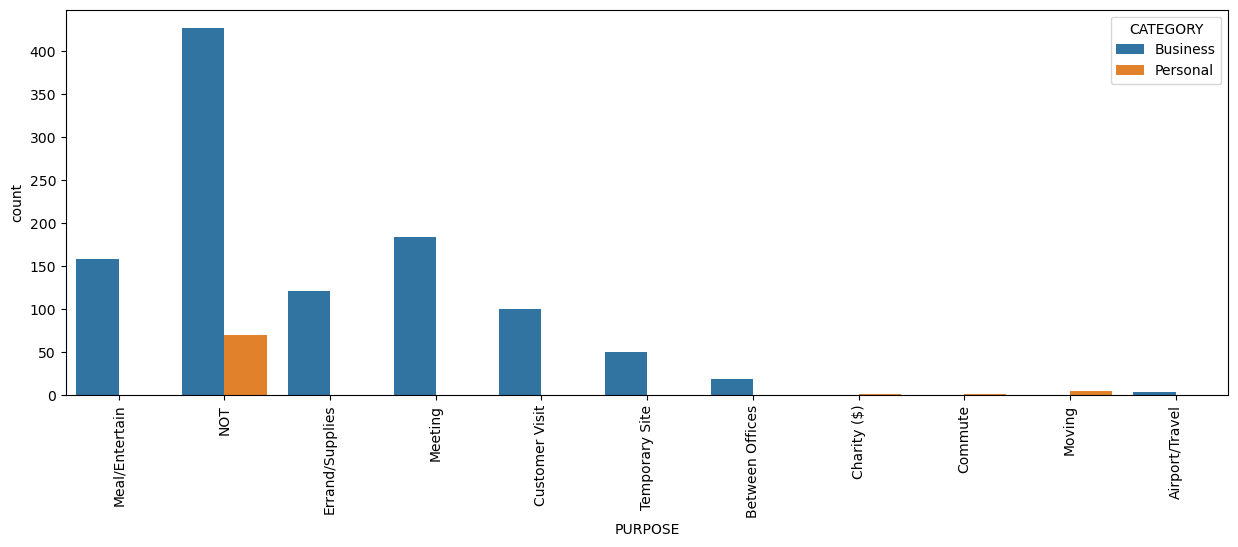

In [50]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

Conclusions derived from the aforementioned count-plots: 
Most of the rides are set aside for business travelers.
Most people book cabs for events like entertainment, lunches, and meetings.
Between 10 a.m. and 5 p.m. (afternoon), most cabs are booked.

In [55]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd  # Ensure pandas is imported

# Specify the categorical columns to be one-hot encoded
object_cols = ['CATEGORY', 'PURPOSE']

# Initialize the OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Note: `sparse_output` replaces `sparse` in newer sklearn versions

# Apply one-hot encoding
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))

# Preserve the original index
OH_cols.index = dataset.index

# Assign meaningful column names using `get_feature_names_out`
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)

# Drop the original categorical columns from the dataset
df_final = dataset.drop(object_cols, axis=1)

# Concatenate the one-hot encoded columns with the remaining dataset
dataset = pd.concat([df_final, OH_cols], axis=1)


Let's now use a heat map to show the correlation between the columns.

<Axes: >

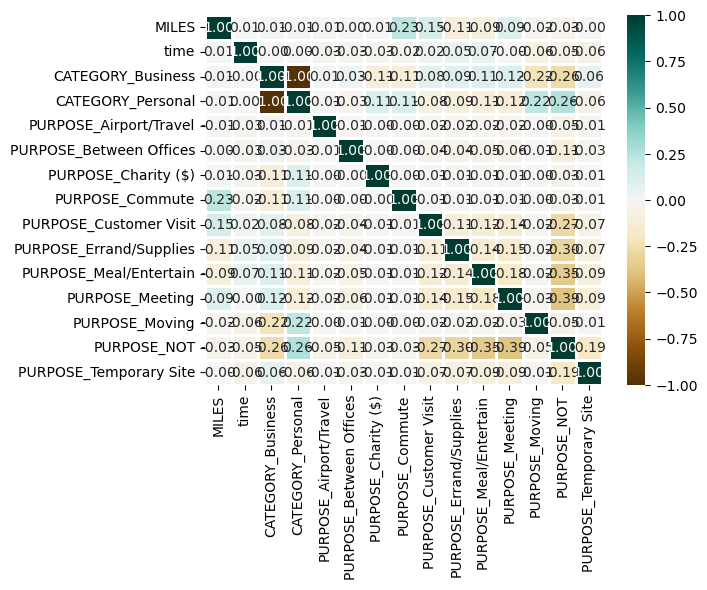

In [58]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)



The heatmap demonstrated the previously demonstrated high negative association between the personal and business categories. Consequently, this figure validates the previously established findings.
There's not much of a correlation between the features.
Now we need to see the data for the month. You can do this the same way you did before (for hours). 

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

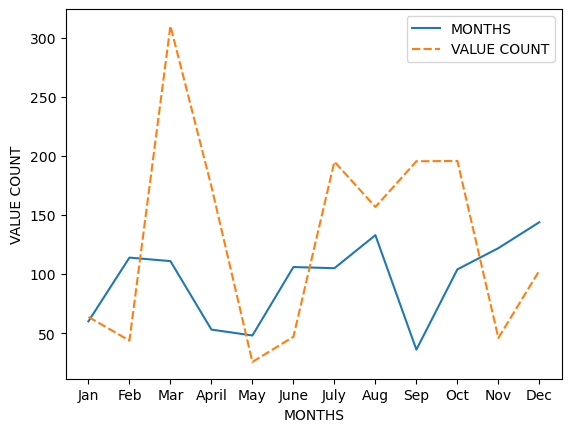

In [61]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

The plot above provides the following insights: The counts are highly erratic.
In Florida, the United States, winters are justified because it is still evident that the counts are quite low in November, December, and January.
data visualization for days.

In [64]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

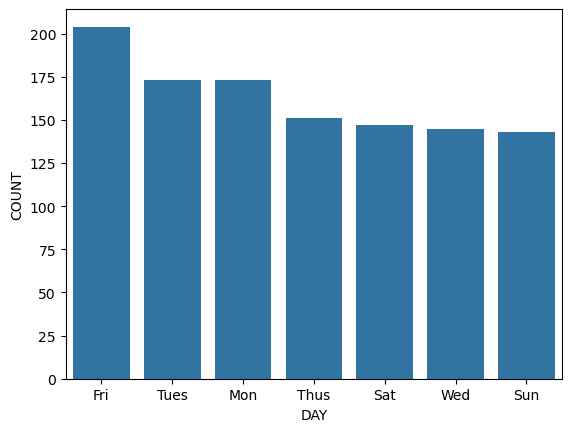

In [66]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

Now let's look into the MILES Column.
We can use a boxplot to look at the distribution of the column.

<Axes: ylabel='MILES'>

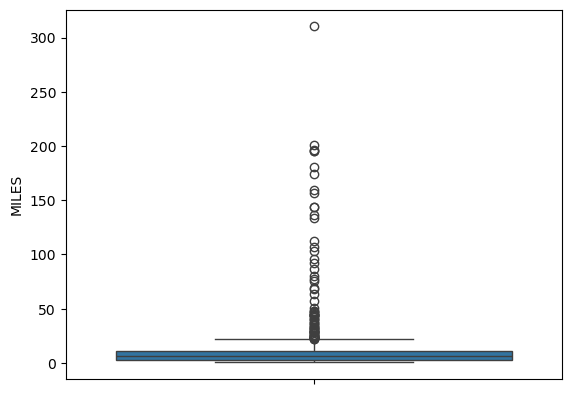

In [69]:
sns.boxplot(dataset['MILES'])

Based on the plots above, most of the taxis were reserved for a four- to five-mile radius.
Most people use cabs for journeys of 0 to 20 kilometers.
There are hardly any taxis for trips longer than twenty miles.